In [13]:
# Define parameters to run the notebook here

# Example params where oscillation is seen
C = 0.015
Gc = 0.1
ggap = 1.0
gsyn = 1.0

# Example params where oscillation is destroyed
"""
C = 0.002
Gc = 0.7
ggap = 1.0
gsyn = 1.0
"""

'\nC = 0.002\nGc = 0.7\nggap = 1.0\ngsyn = 1.0\n'

# Run simulation

In [15]:
import numpy as np
import pandas as pd
import time
from neural_model import NeuralModel
from simulation_functions import *
from sklearn.decomposition import PCA
from util.analysis_util import *
from util.neuron_metadata import *
from util.plot_util import *

neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json('data/chem.json')

start_time = time.time()
fwd_dynamics = simulate_until_stable(C, Gc, ggap, gsyn)
elapsed_time = time.time() - start_time

# Simulation key statistics

In [16]:
pca = PCA()
n = fwd_dynamics.shape[0]

# Perform mean-centering before PCA
X = fwd_dynamics - fwd_dynamics.mean(axis= 0)
projected_X = pca.fit_transform(fwd_dynamics)
dominant_period = get_period(projected_X[:,0])

eigen_vals = get_eigenvalues_from_pca(pca, n)
dimensionality = get_dimensionality(eigen_vals)
print("Elapsed time: {0:.2f}s".format(elapsed_time))
print("Dominant period: {0:.2f}".format(dominant_period))
print("Dimensionality: {0:.2f}".format(dimensionality))

Elapsed time: 1.91s
Dominant period: 2.12
Dimensionality: 1.60


# Simulation summarized dynamics

Text(0.5, 1.0, 'Top 2 PCs')

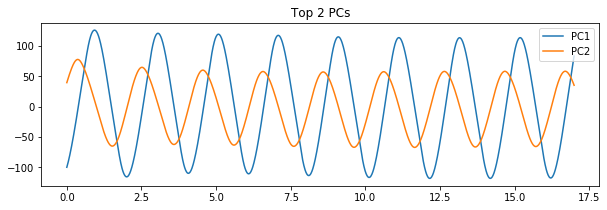

In [17]:
times = np.arange(0, n * 0.01 , 0.01)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.plot(times, projected_X[:,0], label = "PC1")
ax.plot(times, projected_X[:,1], label = "PC2")
ax.legend()
ax.set_title("Top 2 PCs")

# Plot one neuron just to show the oscillation
# plot_saved_dynamics(['AVL', 'PLML', 'VB01'], fwd_dynamics, neuron_metadata_collection)

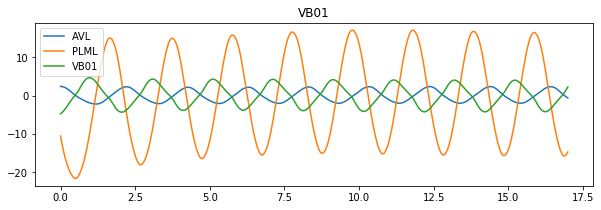

In [18]:
# AVL = interneuron. PLML = sensory neuron. VB01 = motor neuron.
_ = plot_saved_dynamics_collapsed(['AVL', 'PLML', 'VB01'], fwd_dynamics, neuron_metadata_collection)